# COVID-19 Spread Modelling


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### loading dataset

In [2]:
infected_dataset = 'data/csse_covid_19_data/time_series_covid19_confirmed_global.csv'
recovered_dataset = 'data/csse_covid_19_data/time_series_covid19_recovered_global.csv'
deaths_dataset = 'data/csse_covid_19_data/time_series_covid19_deaths_global.csv'
countries_dataset = 'data/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv'

In [3]:
infected = pd.read_csv(infected_dataset)
recovered = pd.read_csv(recovered_dataset)
deaths = pd.read_csv(deaths_dataset)
countries = pd.read_csv(countries_dataset)

# let see infected dataset
infected.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


Q(1) Plot Rt graphs for 5-6 different countries on one plot for comparison, or using several plots side-by-side

## Preprocessing data

In [4]:
infected = infected.groupby('Country/Region').sum()
recovered = recovered.groupby('Country/Region').sum()
deaths = deaths.groupby('Country/Region').sum()

# drop column contain geolocation i.e lat & long
infected.drop(columns=['Lat','Long'],inplace=True)
recovered.drop(columns=['Lat','Long'],inplace=True)
deaths.drop(columns=['Lat','Long'],inplace=True)

infected

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
Albania,0,0,0,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
Algeria,0,0,0,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
Andorra,0,0,0,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
Angola,0,0,0,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
Winter Olympics 2022,0,0,0,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
Yemen,0,0,0,0,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945


In [5]:
countries

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
0,4,AF,AFG,4.0,NaN,NaN,NaN,Afghanistan,33.939110,67.709953,Afghanistan,38928341.0
1,8,AL,ALB,8.0,NaN,NaN,NaN,Albania,41.153300,20.168300,Albania,2877800.0
2,10,AQ,ATA,10.0,NaN,NaN,NaN,Antarctica,-71.949900,23.347000,Antarctica,NaN
3,12,DZ,DZA,12.0,NaN,NaN,NaN,Algeria,28.033900,1.659600,Algeria,43851043.0
4,20,AD,AND,20.0,NaN,NaN,NaN,Andorra,42.506300,1.521800,Andorra,77265.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4316,84056037,US,USA,840.0,56037.0,Sweetwater,Wyoming,US,41.659439,-108.882788,"Sweetwater, Wyoming, US",42343.0
4317,84056039,US,USA,840.0,56039.0,Teton,Wyoming,US,43.935225,-110.589080,"Teton, Wyoming, US",23464.0
4318,84056041,US,USA,840.0,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,"Uinta, Wyoming, US",20226.0
4319,84056043,US,USA,840.0,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,"Washakie, Wyoming, US",7805.0


<AxesSubplot:>

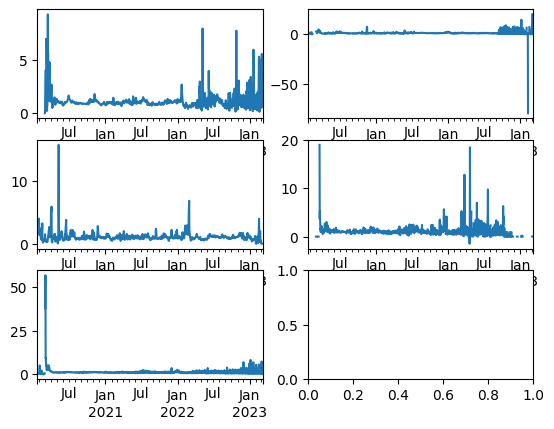

In [120]:
def mkframe(country):
    df = pd.DataFrame({ 'infected' : infected.loc[country] ,
                        'recovered' : recovered.loc[country],
                        'deaths' : deaths.loc[country]})
    df.index = pd.to_datetime(df.index)
    return df


df1 = mkframe('Algeria')
df2 = mkframe('Australia')
df3 = mkframe('China')
df4 = mkframe('Nigeria')
df5 = mkframe('US')

df1['ninfected'] = df1['infected'].diff()
df2['ninfected'] = df2['infected'].diff()
df3['ninfected'] = df3['infected'].diff()
df4['ninfected'] = df4['infected'].diff()
df5['ninfected'] = df5['infected'].diff()

df1['Rt'] = df1['ninfected'].rolling(8).apply(lambda x: x[4:].sum()/x[:4].sum())
df2['Rt'] = df2['ninfected'].rolling(8).apply(lambda x: x[4:].sum()/x[:4].sum())
df3['Rt'] = df3['ninfected'].rolling(8).apply(lambda x: x[4:].sum()/x[:4].sum())
df4['Rt'] = df4['ninfected'].rolling(8).apply(lambda x: x[4:].sum()/x[:4].sum())
df5['Rt'] = df5['ninfected'].rolling(8).apply(lambda x: x[4:].sum()/x[:4].sum())

fig, axes = plt.subplots(nrows=3,ncols=2)
df1['Rt'].plot(ax=axes[0,0])
df2['Rt'].plot(ax=axes[0,1])
df3['Rt'].plot(ax=axes[1,0])
df4['Rt'].plot(ax=axes[1,1])
df5['Rt'].plot(ax=axes[2,0])

Q(2) See how the number of deaths and recoveries correlate with number of infected cases